     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 43.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d47a6cadb16554c5dd9790020106c6e9b9c9f78408fc39a05b67df88805de561
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


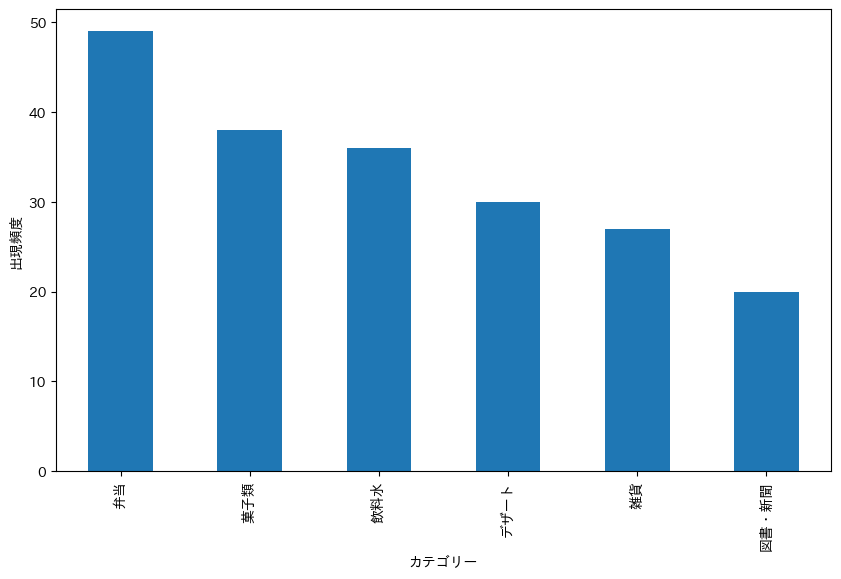

,count,mean,std,min,25%,50%,75%,max
商品番号,,,,,,,,
1QJFO8QY,32.0,35.250000,18.461818,0.0,24.0,36.0,49.5,60.0
2HSTCDWM,20.0,29.400000,21.137146,0.0,12.0,27.0,48.0,60.0
48XMJXKO,10.0,21.600000,13.326665,0.0,13.5,21.0,30.0,42.0
8T7D5DQA,21.0,25.142857,18.260027,0.0,12.0,36.0,42.0,54.0
MESUDVWQ,17.0,43.764706,18.219253,0.0,42.0,48.0,54.0,60.0
QRMOGNUU,27.0,33.111111,16.588535,6.0,21.0,36.0,48.0,60.0
S6RE8W6X,20.0,33.300000,21.631118,0.0,12.0,39.0,54.0,60.0
X0ZE2ZMY,14.0,21.857143,21.901377,0.0,1.5,15.0,39.0,60.0
YY4HAAZR,17.0,31.764706,18.095336,0.0,18.0,30.0,42.0,60.0


In [5]:
!pip install japanize_matplotlib

# pandasライブラリを読み込む
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib

# csvファイルを読み込む（データフレームとして呼び出される）
df = pd.read_csv('/content/sample_pandas_6.csv')
# 先頭から5行目までのデータを表示する
#df.head()

def tax(x):
    return x * 1.10

df['単価'].apply(tax)
#type(df['発注日'].loc[0])
df['発注日'] = pd.to_datetime(df['発注日'])

tax_series = df['単価'].apply(tax)
tax_series.name = "単価（税込)"
pd.concat([df, tax_series], axis = 1)
category_df = pd.read_csv('category.csv')
#category_df
df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how = 'inner' , on = '商品番号')
df

category_count = df['カテゴリー'].value_counts()
fig, ax = plt.subplots(figsize=(10,6))

category_count.plot(kind='bar', ax=ax)

ax.set_xlabel('カテゴリー')
ax.set_ylabel('出現頻度')

plt.show()

df.groupby('商品番号')['注文数'].describe()
